<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Necessary-Libraries" data-toc-modified-id="Import-Necessary-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Necessary Libraries</a></span></li><li><span><a href="#Load-Dataset" data-toc-modified-id="Load-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Dataset</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Split-Data-for-Train-and-Test-Phase" data-toc-modified-id="Split-Data-for-Train-and-Test-Phase-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Split Data for Train and Test Phase</a></span></li><li><span><a href="#Fit-Model" data-toc-modified-id="Fit-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fit Model</a></span></li><li><span><a href="#Evaluation-Model" data-toc-modified-id="Evaluation-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Evaluation Model</a></span></li></ul></div>

# Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score

# Load Dataset

In [3]:
data = pd.read_csv('student-por.csv',sep=';')
len(data)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Preprocessing

In [4]:
# calculate final score and create label
data['pass'] = data.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3'])>=35 else 0, axis=1)
data = data.drop(['G1','G2','G3'], axis=1)
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [5]:
print("Percentage of Passed Student: ", len(data[data['pass']==1])/len(data))
print("Percentage of Failed Student: ", len(data[data['pass']==0])/len(data))

Percentage of Passed Student:  0.5053929121725732
Percentage of Failed Student:  0.4946070878274268


In [4]:
print(data['Mjob'].unique())

['at_home' 'health' 'other' 'services' 'teacher']


In [6]:
data = pd.get_dummies(data, columns = ['sex', 'school','address','famsize','Pstatus','Mjob',
                                    'Fjob','reason','guardian','schoolsup','famsup',
                                    'paid','activities','nursery','higher','internet','romantic'])
data.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [7]:
data = data.sample(frac=1)
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
149,15,4,3,2,4,0,2,2,2,1,...,1,0,0,1,0,1,0,1,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
54,15,3,3,1,1,0,5,3,4,4,...,1,0,0,1,0,1,0,1,1,0
191,17,3,3,1,2,0,4,3,4,1,...,0,1,1,0,0,1,0,1,1,0
200,16,1,2,1,1,0,3,3,3,1,...,0,1,0,1,0,1,0,1,0,1


# Split Data for Train and Test Phase
Hold out technique

In [7]:
data_train = data[0:500]
data_test = data[500:]

data_train_att = data_train.drop(['pass'], axis=1)
data_train_pass = data_train['pass']

data_test_att = data_test.drop(['pass'], axis=1)
data_test_pass = data_test['pass']

# Fit Model

In [8]:
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
model = model.fit(data_train_att, data_train_pass)

# Evaluation Model

In [9]:
model.score(data_test_att, data_test_pass)

0.6442953020134228

In [12]:
data_att = data.drop(['pass'], axis=1)
data_pass = data['pass']

scoresAll = cross_val_score(model, data_att, data_pass, cv=5)
print("Total Accuracy: %0.2f (+/- %0.2f)" %(scoresAll.mean(), scoresAll.std()*2))

Total Accuracy: 0.67 (+/- 0.07)


In [13]:
for max_depth in range(1,20):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    
    scoresTotal = cross_val_score(model, data_att, data_pass, cv=5)
    print("Max depth: %d, Total Accuracy: %0.2f (+/- %0.2f)" %(max_depth, scoresTotal.mean(), scoresTotal.std()*2))

Max depth: 1, Total Accuracy: 0.64 (+/- 0.01)
Max depth: 2, Total Accuracy: 0.69 (+/- 0.06)
Max depth: 3, Total Accuracy: 0.70 (+/- 0.07)
Max depth: 4, Total Accuracy: 0.69 (+/- 0.06)
Max depth: 5, Total Accuracy: 0.70 (+/- 0.05)
Max depth: 6, Total Accuracy: 0.69 (+/- 0.02)
Max depth: 7, Total Accuracy: 0.68 (+/- 0.04)
Max depth: 8, Total Accuracy: 0.67 (+/- 0.07)
Max depth: 9, Total Accuracy: 0.67 (+/- 0.04)
Max depth: 10, Total Accuracy: 0.69 (+/- 0.08)
Max depth: 11, Total Accuracy: 0.66 (+/- 0.04)
Max depth: 12, Total Accuracy: 0.67 (+/- 0.08)
Max depth: 13, Total Accuracy: 0.65 (+/- 0.10)
Max depth: 14, Total Accuracy: 0.66 (+/- 0.07)
Max depth: 15, Total Accuracy: 0.65 (+/- 0.05)
Max depth: 16, Total Accuracy: 0.66 (+/- 0.04)
Max depth: 17, Total Accuracy: 0.65 (+/- 0.04)
Max depth: 18, Total Accuracy: 0.64 (+/- 0.08)
Max depth: 19, Total Accuracy: 0.63 (+/- 0.06)


In [14]:
depth_acc = np.empty((19,3), float)
i=0
for max_depth in range(1,20):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(model, data_att, data_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1

depth_acc

array([[1.00000000e+00, 6.37912940e-01, 1.26650922e-02],
       [2.00000000e+00, 6.87215265e-01, 6.26457403e-02],
       [3.00000000e+00, 6.99522958e-01, 7.36847831e-02],
       [4.00000000e+00, 6.91818724e-01, 6.40696630e-02],
       [5.00000000e+00, 6.96422182e-01, 5.28379574e-02],
       [6.00000000e+00, 6.87239117e-01, 2.55010254e-02],
       [7.00000000e+00, 6.82576029e-01, 4.20795149e-02],
       [8.00000000e+00, 6.81013715e-01, 6.34572827e-02],
       [9.00000000e+00, 6.79475253e-01, 4.61180788e-02],
       [1.00000000e+01, 6.76410256e-01, 9.89305071e-02],
       [1.10000000e+01, 6.70244484e-01, 3.05466379e-02],
       [1.20000000e+01, 6.61013715e-01, 6.38389510e-02],
       [1.30000000e+01, 6.54812165e-01, 8.51847023e-02],
       [1.40000000e+01, 6.74812165e-01, 6.99034132e-02],
       [1.50000000e+01, 6.27060227e-01, 7.05397231e-02],
       [1.60000000e+01, 6.53261777e-01, 7.44698614e-02],
       [1.70000000e+01, 6.62504472e-01, 5.67508179e-02],
       [1.80000000e+01, 6.45569

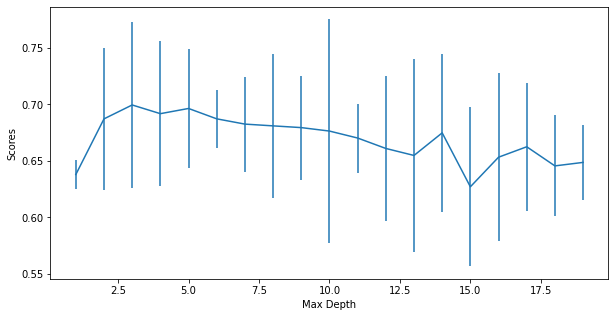

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.xlabel("Max Depth")
plt.ylabel("Scores")
plt.show()